In [1]:
import pandas as pd

In [3]:
path = 'https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/'
wdf = pd.read_csv(path+'weather.csv', encoding='UTF-8').set_index('일시')

wdf['year'] = pd.DatetimeIndex(wdf.index).year

y_means = wdf.groupby('year').mean(numeric_only=True)
y_means.drop([2010, 2020], axis=0)

,평균 기온,최대 풍속,평균 풍속
year,,,
2011,12.073425,8.355616,4.251233
2012,11.892896,7.794490,3.863912
2013,12.795068,7.859726,3.874795
2014,12.844110,7.458904,3.816438
2015,13.162466,7.694247,3.799449
2016,13.243443,7.963934,3.977869
2017,13.111233,8.001370,3.934795
2018,13.041644,8.158630,4.085479
2019,13.767671,7.796703,3.854396


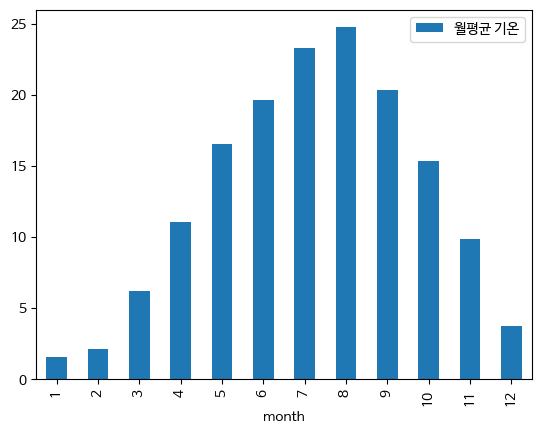

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', family="NanumBarunGothic")

wdf['month'] = pd.DatetimeIndex(wdf.index).month
means = wdf.groupby('month').mean(numeric_only=True)

means['평균 기온'].plot(kind='bar', label='월평균 기온')
plt.legend()
plt.show()

In [13]:
wdf = pd.read_csv(path+'weather.csv', encoding='UTF-8').set_index('일시')
missing_data1 = wdf[wdf['평균 풍속'].isna()]

df = missing_data1.dropna(axis=1, how='any')
print(df)

            평균 기온
일시               
2012-02-11   -0.7
2012-02-12    0.4
2012-02-13    4.0
2015-03-22   10.1
2015-04-01    7.3
2019-04-18   15.7


/opt/anaconda3/envs/sseul2/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


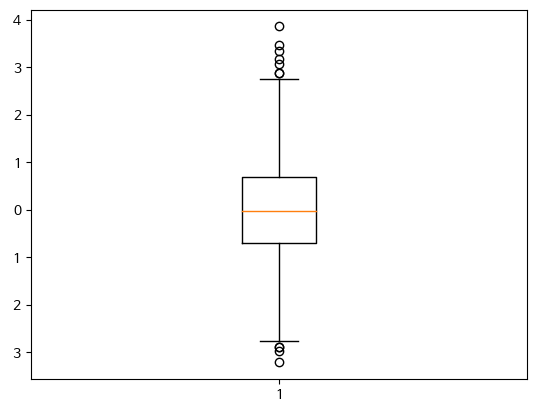

df의 이상치 수: 11
df의 최대 이상치: 3.85793967348964
df의 최소 이상치: -3.209955381978046


In [17]:
import numpy as np
np.random.seed(100)
rnd = np.random.randn(1000, 1)
df = pd.DataFrame(rnd)

plt.boxplot(rnd)
plt.show()

def find_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return outliers

outliers = find_outliers_IQR(df[0])
print(f'df의 이상치 수: {str(len(outliers))}')
print(f'df의 최대 이상치: {str(outliers.max())}')
print(f'df의 최소 이상치: {str(outliers.min())}')